<a href="https://colab.research.google.com/github/vaibhavhirani/ML-Loan-Assignment/blob/main/Baseline_models_Random_Forest%2C_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os
import sys
from google.colab import drive
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, precision_recall_curve, auc

In [5]:
# mount G-Drive folder
drive.mount('/content/drive') 
os.listdir('/content/drive/MyDrive/ML_Loan/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['filtered_LoanStats_securev1_2017Q3.csv',
 'filtered_LoanStats3c_securev1_2014.csv',
 'filtered_LoanStats_securev1_2017Q1.csv',
 'filtered_LoanStats_securev1_2017Q2.csv',
 'filtered_LoanStats3d_securev1_2015.csv',
 'Ficoed',
 'Baseline']

In [9]:
os.listdir('/content/drive/MyDrive/ML_Loan/Ficoed')

['filtered_LoanStats_securev1_2017Q1.csv',
 'filtered_LoanStats_securev1_2017Q3.csv',
 'filtered_LoanStats_securev1_2017Q2.csv',
 'filtered_LoanStats3d_securev1_2015.csv',
 'filtered_LoanStats3c_securev1_2014.csv',
 'filtered_LoanStats.csv']

In [8]:
data_baseline = pd.read_csv('/content/drive/MyDrive/ML_Loan/Baseline/cleaned_loan_data.csv')
data_baseline.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,...,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
count,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,4.576620e+05,457662.000000,457662.000000,457662.000000,457662.0,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.00000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,4.576620e+05,457662.000000,457662.00000,457662.000000,457662.0,457662.0,457662.000000,457662.000000,457662.000000,457662.000000,4.576620e+05,...,457662.000000,457662.000000,457662.000000,457662.0,457662.000000,457662.000000,4.576620e+05,4.576620e+05,4.576620e+05,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,4.576620e+05,4.576620e+05,457662.000000,4.576620e+05,457662.0,457662.000000,457662.000000
mean,228859.628326,14559.942600,14559.942600,14554.630424,0.254935,90.070447,440.270832,2.504735,16.794433,63062.621896,3.982939,2.707981,7.585263e+04,0.886220,15.774388,0.783493,0.0,11.507064,907.708617,448.327126,21.016453,18.350558,0.337470,348.58307,693.359947,697.360054,0.697371,11.800558,0.239913,1.629531e+04,611.333259,26.01519,0.566280,0.0,0.0,14537.278440,14532.182055,12100.387456,2210.831596,1.046612e+00,...,674.471982,657.426736,0.018273,1.0,0.003297,0.005696,2.721372e+02,1.402815e+05,3.184950e+04,4.810764,13341.935009,0.010497,12.947560,182.479432,12.497227,7.519211,1.773623,0.532382,3.632093,5.706128,4.713664,8.379855,8.766411,8.348146,15.196580,5.652436,11.747108,0.003666,0.094371,2.236288,94.141312,0.148590,0.056824,1.721595e+05,4.976349e+04,20745.260216,4.174054e+04,0.0,0.999974,0.982044
std,132135.178141,8536.723785,8536.723785,8533.428059,0.435825,58.910061,254.207166,1.830379,10.275194,39202.334796,3.798128,0.645681,6.591027e+04,0.833514,8.829657,0.411864,0.0,2.453626,272.573828,268.885004,14.921870,8.886741,0.909225,189.24664,30.479932,30.480467,0.978793,5.469185,0.634354,2.229401e+04,354.925060,12.16476,0.495588,0.0,0.0,9969.888250,9966.356136,8805.751570,2210.694985,7.395097e+00,...,80.801082,131.884655,0.152519,0.0,0.057327,0.080911,1.369485e+04,1.550323e+05,3.573640e+04,3.156393,16043.784590,0.117081,713.232688,92.886663,15.657252,8.285148,2.083840,1.330449,2.200897,3.257702,2.905274,4.882280,7.476229,4.516877,8.283519,3.188313,5.456889,0.064396,0.515714,1.818002,8.591414,0.398219,0.420720,1.735966e+05,4.725554e+04,21012.053333,4.264623e+04,0.0,0.005121,0.132793
min,0.000000,1000.000000,1000.000000,900.000000,0.000000,0.000000,14.010000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+02,0.000000,0.000000,0.000000,0.0

In [ ]:
# Train-test split
y_bl = data_baseline['loan_status']
X_bl = data_baseline.drop(['loan_status'], axis=1)
X_train_bl, X_test_bl, y_train_bl, y_test_bl = train_test_split(X_bl, y_bl, test_size=0.2)
X_train_bl.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
count,366129.000000,366129.000000,366129.000000,366129.000000,366129.000000,366129.000000,366129.000000,366129.000000,366129.000000,366129.000000,366129.000000,366129.000000,3.661290e+05,366129.000000,366129.000000,366129.0,366129.000000,366129.000000,366129.000000,366129.000000,366129.000000,366129.000000,366129.000000,366129.000000,366129.000000,366129.000000,366129.000000,366129.000000,3.661290e+05,366129.000000,366129.000000,366129.000000,366129.0,366129.0,366129.000000,366129.000000,366129.000000,366129.000000,3.661290e+05,366129.000000,...,366129.000000,366129.000000,366129.000000,366129.0,366129.000000,366129.000000,3.661290e+05,3.661290e+05,3.661290e+05,366129.000000,366129.000000,366129.000000,366129.000000,366129.000000,366129.000000,366129.000000,366129.000000,366129.000000,366129.000000,366129.000000,366129.000000,366129.000000,366129.000000,366129.000000,366129.000000,366129.000000,366129.000000,366129.000000,366129.000000,366129.000000,366129.000000,366129.000000,366129.000000,3.661290e+05,3.661290e+05,366129.000000,3.661290e+05,366129.0,366129.000000,366129.000000
mean,228880.772435,14555.945787,14555.945787,14550.617526,0.254733,90.050337,440.188506,2.504246,16.802419,63071.419486,3.987917,2.707442,7.583436e+04,0.886155,15.767757,0.0,11.505751,907.651738,448.503011,21.019408,18.354851,0.337477,348.752401,693.358884,697.358988,0.697992,11.802021,0.240003,1.628362e+04,611.450180,26.020971,0.565743,0.0,0.0,14532.864412,14527.762987,12094.965622,2211.341059,1.046255e+00,225.511474,...,674.483627,657.416211,0.018032,1.0,0.003340,0.005697,2.756535e+02,1.401997e+05,3.184612e+04,4.810408,13329.734293,0.010455,11.785909,182.349890,12.487888,7.523531,1.772078,0.531935,3.630622,5.703353,4.713352,8.380825,8.773099,8.347468,15.197305,5.649031,11.748501,0.003693,0.094125,2.236919,94.143009,0.148915,0.056360,1.720726e+05,4.979247e+04,20741.854316,4.177766e+04,0.0,0.999975,0.981782
std,132143.355883,8533.128513,8533.128513,8529.819520,0.435711,58.931515,254.023822,1.831080,10.275068,39155.006370,3.799033,0.645484,6.658622e+04,0.833234,8.831796,0.0,2.455291,272.481352,268.992294,14.927221,8.999601,0.908938,189.209574,30.501759,30.502277,0.978949,5.474752,0.633028,2.224644e+04,354.901798,12.181140,0.495660,0.0,0.0,9964.943877,9961.430041,8800.545797,2212.894626,7.376006e+00,889.809431,...,80.816061,131.963859,0.152089,0.0,0.057699,0.081470,1.526780e+04,1.547683e+05,3.636868e+04,3.154448,15997.031667,0.116907,650.245392,92.838766,15.611145,8.289646,2.082448,1.328875,2.198903,3.254164,2.905966,4.881632,7.497585,4.510099,8.283961,3.183101,5.462468,0.065002,0.515456,1.820715,8.597203,0.398318,0.419014,1.736200e+05,4.736579e+04,20970.868574,4.278627e+04,0.0,0.004958,0.133738
min,0.000000,1000.000000,1000.000000,900.000000,0.000000,0.000000,14.010000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+02,0.000000,0.000000,0.0

In [ ]:
# Random Forest classifier
rf_classifier_bl = RandomForestClassifier(n_estimators=200,
                                max_features=0.25,
                                criterion="entropy",
                                class_weight="balanced")

rf_classifier_bl.fit(X_train_bl, y_train_bl)
y_pred_rf_bl = rf_classifier_bl.predict(X_test_bl)
print(f'Random Forest baseline accuracy: {accuracy_score(y_test_bl, y_pred_rf_bl)}')

Random Forest accuracy: 0.9990604481443851


In [ ]:
# Random Forest classification report
print(f'Random Forest baseline classification report: {classification_report(y_test_bl, y_pred_rf_bl)}')

Random Forest baseline classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19856
           1       1.00      1.00      1.00     71677

    accuracy                           1.00     91533
   macro avg       1.00      1.00      1.00     91533
weighted avg       1.00      1.00      1.00     91533



In [ ]:
# Random Forest confusion matrix
print(f'Random Forest baseline confusion matrix:\n {confusion_matrix(y_test_bl, y_pred_rf_bl)}')

Random Forest confusion matrix:
 [[19770    86]
 [    0 71677]]


In [ ]:
# Random Forest ROC-AUC
print(f'Random Forest baseline ROC-AUC Score: {roc_auc_score(y_test_bl, y_pred_rf_bl)}')

Random Forest baseline ROC-AUC Score: 0.9978344077356971


Random Forest baseline AUPRC score: 0.9994008054289816


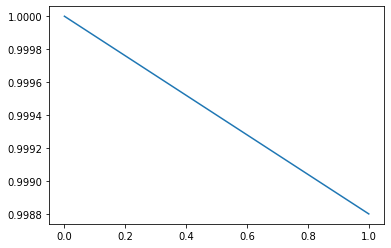

In [ ]:
# Random Forest AUPRC
precision_rf_bl, recall_rf_bl, thresholds_rf_bl = precision_recall_curve(y_test_bl, y_pred_rf_bl)
print(f'Random Forest baseline AUPRC score: {auc(recall_rf_bl, precision_rf_bl)}')

plt.plot(recall_rf_bl, precision_rf_bl)
plt.show()

In [ ]:
ann_bl = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(37, 12), random_state=1)
ann_bl.fit(X_train_bl, y_train_bl)
y_pred_ann_bl = ann_bl.predict(X_test_bl)
print(f'ANN baseline accuracy: {accuracy_score(y_test_bl, y_pred_ann_bl)}')

ANN Accuracy: 0.9963728928364634


In [ ]:
# ANN baseline classification report
print(f'ANN baseline classification report: {classification_report(y_test_bl, y_pred_ann_bl)}')

ANN baseline classification report:               precision    recall  f1-score   support

           0       1.00      0.98      0.99     19856
           1       1.00      1.00      1.00     71677

    accuracy                           1.00     91533
   macro avg       1.00      0.99      0.99     91533
weighted avg       1.00      1.00      1.00     91533



In [ ]:
# ANN baseline confusion matrix
print(f'ANN baseline confusion matrix: \n{confusion_matrix(y_test_bl, y_pred_ann_bl)}')

ANN baseline confusion matrix: 
[[19525   331]
 [    1 71676]]


In [ ]:
# ANN baseline ROC-AUC
print(f'ANN baseline ROC-AUC Score: {roc_auc_score(y_test, y_pred_ann)}')

ANN baseline ROC-AUC Score: 0.5942046705254277


ANN baseline AUPRC score: 0.9977000991156509


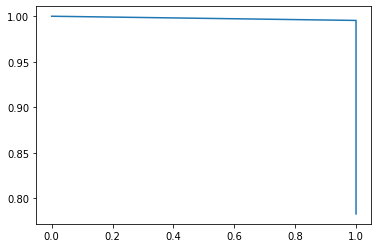

In [ ]:
# ANN baseline AUPRC
precision_ann_bl, recall_ann_bl, thresholds_ann_bl = precision_recall_curve(y_test_bl, y_pred_ann_bl)
print(f'ANN baseline AUPRC score: {auc(recall_ann_bl, precision_ann_bl)}')

plt.plot(recall_ann_bl, precision_ann_bl)
plt.show()